In [3]:
import os
import pandas as pd
import csv
import numpy as np

#Question 3 Imports
 
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

#Question 4 Imports
from sklearn.mixture import GMM
import numpy as np
from sklearn.decomposition import PCA   

import matplotlib.pyplot as plt

In [17]:
#Merging the normal csv
#Merging the normal csv
read_columns_once = False;

with open('merged_exp_normal.csv', mode='w') as file:  #Opening/Creating the file to be written in
    csvWriterOption = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #setting up the csv options
    for i in os.listdir('Datasets/Normal_Experiments'):
        data = pd.DataFrame(pd.read_csv('Datasets/Normal_Experiments/'+i)) #Read the data and convert it to a dataframe
        
        if(read_columns_once == False): #Check to read the columns name only once
            csvWriterOption.writerow(data.columns) #Write the column names
            read_columns_once = True
            
        rows = data[data.Sds_Armed == 1] #grabbing the rows that contain Sds_Armed = 1
        for j in range(len(rows)):
            csvWriterOption.writerow(rows.iloc[j])  #Writing row by row to the file
    

In [4]:
#Merging the anomaly csv
#Merging the anomaly csv
read_columns_once = False;

with open('merged_exp_contains_anomalies.csv', mode='w') as file:  #Opening/Creating the file to be written in
    csvWriterOption = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #setting up the csv options
    for i in os.listdir('Datasets/Experiments_with_Anomalies'):
        data = pd.DataFrame(pd.read_csv('Datasets/Experiments_with_Anomalies/'+i)) #Read the data and convert it to a dataframe
        
        if(read_columns_once == False): #Check to read the columns name only once
            csvWriterOption.writerow(data.columns) #Write the column names
            read_columns_once = True
        
        rows = data[data.Sds_Armed == 1] #grabbing the rows that contain Sds_Armed = 1
        for j in range(len(rows)):
            csvWriterOption.writerow(rows.iloc[j])  #Writing row by row to the file

In [6]:
#using the labels to get feature importance
#using the labels to get feature importance
data2 = pd.DataFrame(pd.read_csv('merged_exp_contains_anomalies.csv'))


# data2['label'] = np.ones(len(data2))
data2['label'] = data2['Anomaly_Tag']
# allData = pd.concat( [data1, data2])
data2 = data2.drop(['Sds_Armed','Anomaly_Tag'],axis=1)

allDataY = data2['label']

allDataX = data2.drop(labels='label',axis=1)

allDataX = allDataX.to_numpy()
allDataY = allDataY.to_numpy()


In [7]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(allDataX,allDataY)
print(model.feature_importances_) #use inbuilt class
important_features = model.feature_importances_.argsort()[len(model.feature_importances_) - 2:] #Getting the two highest rank features

[0.24022123 0.16591747 0.13091697 0.14490979 0.08655645 0.07895556
 0.07087139 0.08165114]


In [8]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(allDataX, allDataY)
fit.scores_

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

#Testing GMM libraries
#Testing GMM libraries
gmm = GMM(n_components=8,covariance_type='diag').fit(allDataX)
probs = gmm.predict_proba(allDataX)
probs

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#Using PCA for dimisionality reduction
#Using PCA for dimisionality reduction
pca = PCA(n_components=2)
pca.fit(allDataX)
pca.explained_variance_ratio_
pca.components_

array([[ 4.56647631e-04,  9.48434221e-03,  6.30979153e-01,
         7.75112100e-01, -2.30791684e-04,  3.49133236e-04,
         2.79379056e-02,  1.39885049e-02],
       [-6.78571453e-04,  7.38969146e-03,  6.18823100e-01,
        -5.27131226e-01,  1.40579088e-05,  1.36623641e-02,
         5.49147342e-01,  1.93354883e-01]])

In [15]:
#Reading normal data && dropping unnecessary columns
#Reading normal data && dropping unnecessary columns
allDataX = pd.DataFrame(pd.read_csv('merged_exp_normal.csv'))
allDataX = allDataX.drop(['Sds_Armed','Anomaly_Tag'],axis=1)
allDataX = allDataX.to_numpy()

#Computing the covariance matrix for all features
#Computing the covariance matrix for all features
cov = np.zeros((len(np.array(allDataX[0])),len(np.array(allDataX[0]))));
for i in range(len(allDataX[0])):
    for j in range(len(allDataX[0])):
        if (i<=j):
            cov[i][j] = round(np.sum((allDataX[:,i] - allDataX[:,i].mean()) * (allDataX[:,j] - allDataX[:,j].mean()))/len(allDataX),3)
        if (i<j):
            cov[j][i] = cov[i][j]
            
print('Covariance Matrix for all Feature')
print(cov)
print('Means for all Features')
print(pd.DataFrame(allDataX).mean())
print('')

#Using the two most important features
#Using the two most important features
important_features = model.feature_importances_.argsort()[len(model.feature_importances_) - 2:]

#Computing the covariance matrix for the two most important features based on ranking
#Computing the covariance matrix for the two most important features based on ranking
cov2 = np.zeros((len(important_features),len(important_features)))

for i in range(len(important_features)):
    for j in range(len(important_features)):
        if(i<=j):
            cov2[i][j] = np.sum(((pd.DataFrame(allDataX[:,important_features[i]]) - pd.DataFrame(allDataX[:,important_features[i]]).mean()) * 
            (pd.DataFrame(allDataX[:,important_features[j]]) - pd.DataFrame(allDataX[:,important_features[j]]).mean()))/len(allDataX))
        if(i<j):
            cov2[j][i] = cov2[i][j]
            
print('Covariance Matrix for the two highest ranked features')
print(cov2)
print('Mean for the two highest ranked features')
print(pd.DataFrame(allDataX[:,important_features[:]]).mean())
print('')


#computing the 2 component PCA based on the 8 columns
#computing the 2 component PCA based on the 8 columns
pca = PCA(n_components=2)
pca.fit(allDataX)
allDataXPCA = pca.transform(allDataX)

#Computing the covariance for the transformed data optained from PCA
#Computing the covariance for the transformed data optained from PCA
cov3 = np.zeros((pca.n_components,pca.n_components))

for i in range(pca.n_components):
    for j in range(pca.n_components):
        if (i<=j):
            cov3[i][j] = np.sum((allDataXPCA[:,i] - allDataXPCA[:,i].mean()) * (allDataXPCA[:,j] - allDataXPCA[:,j].mean()))/len(allDataXPCA)
        if (i<j):
            cov3[j][i] = cov3[i][j]

print('Covariance Matrix of the 2 component PCA features')
print(cov3)
print('Mean of the 2 component PCA features')
print(pd.DataFrame(allDataXPCA).mean())

Covariance Matrix for all Feature
[[2.37000e-01 4.70000e-01 3.82800e+00 1.28300e+00 1.42000e-01 2.81000e-01
  2.03400e+00 7.18000e-01]
 [4.70000e-01 9.79000e-01 9.23100e+00 2.87600e+00 2.74000e-01 5.81000e-01
  5.07400e+00 1.61900e+00]
 [3.82800e+00 9.23100e+00 1.93223e+02 4.20860e+01 1.95600e+00 5.18300e+00
  1.12064e+02 2.43730e+01]
 [1.28300e+00 2.87600e+00 4.20860e+01 1.20150e+01 6.71000e-01 1.56700e+00
  2.29600e+01 6.65100e+00]
 [1.42000e-01 2.74000e-01 1.95600e+00 6.71000e-01 6.08000e-01 1.19000e+00
  8.64500e+00 2.80700e+00]
 [2.81000e-01 5.81000e-01 5.18300e+00 1.56700e+00 1.19000e+00 2.46800e+00
  1.96810e+01 6.13800e+00]
 [2.03400e+00 5.07400e+00 1.12064e+02 2.29600e+01 8.64500e+00 1.96810e+01
  3.30800e+02 7.53170e+01]
 [7.18000e-01 1.61900e+00 2.43730e+01 6.65100e+00 2.80700e+00 6.13800e+00
  7.53170e+01 2.21050e+01]]
Means for all Features
0    0.497500
1    0.883802
2    7.763045
3    2.617440
4    0.477496
5    0.849776
6    7.395009
7    2.546401
dtype: float64

Covari

In [5]:
#Function to calculate the probability based on the covariance and the mean
#Function to calculate the probability based on the covariance and the mean
def multivariate_normal(x, covariance,mean):
    d = len(pd.DataFrame(x).columns)
    x_minus_mean = x.to_numpy()-mean
    #return (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance)))
    return (1 / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
        np.exp(-(np.linalg.solve(covariance, x_minus_mean).T.dot(x_minus_mean)) / 2))
#     return (1 / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
#             np.exp(-(np.linalg.inv(covariance).dot(mean.T).dot(mean)) / 2))



#Computing the avg probability of the normal data
#Computing the avg probability of the normal data
pNormalDependent = []
for i in range(len(allNOTDataAnomaly)):
    pNormalDependent.append(  multivariate_normal(allNOTDataAnomaly.iloc[i],cov,pd.DataFrame(allDataX).mean()) )

    
print('Average probability for normal DEPENDENT dataset:', np.sum(pNormalDependent)/len(pNormalDependent)) 
print('Anything bellow the probability above is considered an anomaly')

#FLAG FLAG - If a probability do not surpase the the avg probability value of the normal dataset, flag else !flag
#FLAG FLAG - If a probability do not surpase the the avg probability value of the normal dataset, flag else !flag
#epsilon is set to be the minimal value of the normal probability
AllFeaturesAnomalyDetectionWithIndependentCov=[]
for i in range(len(allDataXFromAnomaly)):
    AllFeaturesAnomalyDetectionWithIndependentCov.append( multivariate_normal(pd.DataFrame(allDataXFromAnomaly).iloc[i],cov,pd.DataFrame(allDataX).mean()) < np.sum(pNormalDependent)/len(pNormalDependent)) 


#Computing probability for most important feature
#Computing probability for most important feature
pNormalDependent = []
for i in range(len(allNOTDataAnomaly)):
    pNormalDependent.append(  multivariate_normal(allNOTDataAnomaly.iloc[i,important_features[:]],cov2,pd.DataFrame(allDataXFromAnomaly.to_numpy()[:,important_features[:]]).mean())  )
# for i in range(len(allDataAnomaly)):
#     pNotNormalDependent.append(  multivariate_normal(allDataAnomaly.iloc[i],cov2,allNOTDataAnomalyMeanDep)  )

print('Average probability for normal DEPENDENT dataset based on highest rank:', np.sum(pNormalDependent)/len(pNormalDependent)) 
print('Anything bellow the probability above is considered an anomaly')

#FLAG FLAG - If a probability do not surpase the the avg probability value of the normal dataset, flag else !flag
#FLAG FLAG - If a probability do not surpase the the avg probability value of the normal dataset, flag else !flag
#epsilon is set to be the minimal value of the normal probability

RankedFeaturesAnomalyDetectionWithIndependentCov=[]
for i in range(len(allDataXFromAnomaly)):
    RankedFeaturesAnomalyDetectionWithIndependentCov.append( multivariate_normal(pd.DataFrame(allDataXFromAnomaly).iloc[i,important_features],cov2,pd.DataFrame(allDataX)[important_features].mean()) < np.sum(pNormalDependent)/len(pNormalDependent))

#Computing probability for most important feature
#Computing probability for most important feature
pNormalDependent = []
for i in range(len(allNOTDataAnomaly)):
    pNormalDependent.append(  multivariate_normal(pd.DataFrame(allDataXPCA).iloc[i],cov3,pd.DataFrame(allDataXPCA).mean()) )
# for i in range(len(allDataAnomaly)):
#     pNotNormalDependent.append(  multivariate_normal(allDataAnomaly.iloc[i],cov2,allNOTDataAnomalyMeanDep)  )

print('Average probability for normal DEPENDENT dataset based on highest rank:', np.sum(pNormalDependent)/len(pNormalDependent)) 
print('Anything bellow the probability above is considered an anomaly')

#FLAG FLAG - If a probability do not surpase the the avg probability value of the normal dataset, flag else !flag
#FLAG FLAG - If a probability do not surpase the the avg probability value of the normal dataset, flag else !flag
#epsilon is set to be the minimal value of the normal probability
pca = PCA(n_components=2)
pca.fit(allDataXFromAnomaly)
allDataXPCAAnomaly = pca.transform(allDataXFromAnomaly)

PCAFeaturesAnomalyDetectionWithIndependentCov=[]
for i in range(len(allDataXFromAnomaly)):
    PCAFeaturesAnomalyDetectionWithIndependentCov.append( multivariate_normal(pd.DataFrame(allDataXPCAAnomaly).iloc[i],cov3,pd.DataFrame(allDataXPCA).mean()) < np.sum(pNormalDependent)/len(pNormalDependent))
    

#AllFeaturesAnomalyDetectionWithIndependentCov = (allDataXFromAnomaly[:] > np.sum(pNormalDependent)/len(pNormalDependent))

Average probability for normal DEPENDENT dataset: 0.017579128551403946
Anything bellow the probability above is considered an anomaly
Average probability for normal DEPENDENT dataset based on highest rank: 0.4546336937301379
Anything bellow the probability above is considered an anomaly
Average probability for normal DEPENDENT dataset based on highest rank: 0.0015132900537772568
Anything bellow the probability above is considered an anomaly


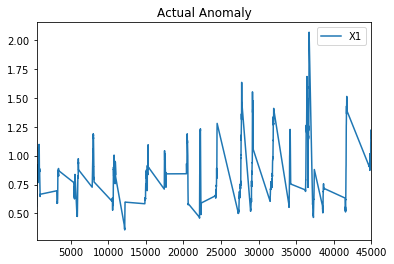

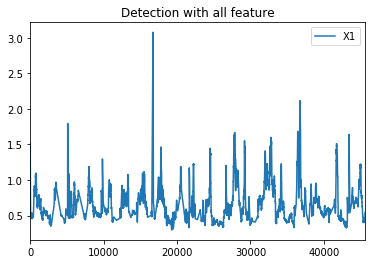

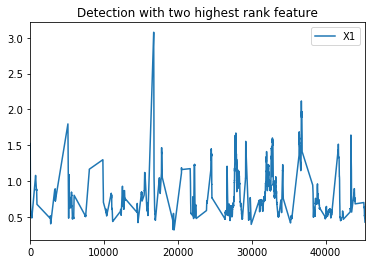

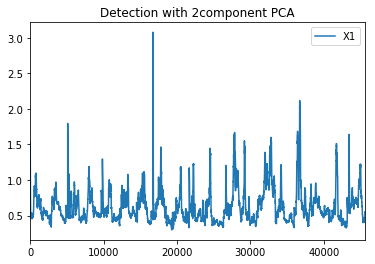

In [6]:
#Ploting the actual anomaly and the detected anomaly

dependentActualBinary = pd.DataFrame(data)['Anomaly_Tag'] == True
#Plot with actual
pd.DataFrame(data[dependentActualBinary]['X1']).plot(title ='Actual Anomaly')
#Plot with all feature
pd.DataFrame(data[AllFeaturesAnomalyDetectionWithIndependentCov]['X1']).plot(title ='Detection with all feature')
#Plot with two highest ranked features
pd.DataFrame(data[RankedFeaturesAnomalyDetectionWithIndependentCov]['X1']).plot(title ='Detection with two highest rank feature')
#Plot with two PCA component
pd.DataFrame(data[PCAFeaturesAnomalyDetectionWithIndependentCov]['X1']).plot(title ='Detection with 2component PCA')

In [9]:
#Testing the anomaly detection with K-MEAN clustering
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 2).fit(allDataXFromAnomaly)

print('Assumed number of anomalies',len(data[k.labels_==1]['X1']))
print('Actual number of anomalies',len(data[dependentActualBinary]['X1']))

#There are some mapping for the anomal detection with K-means

Assumed number of anomalies 1202
Actual number of anomalies 6431


In [10]:
#Getting the scores
#Getting the scores
from sklearn.metrics import confusion_matrix, classification_report
import time


#Dependent Score
#Dependent Score
newAllFeaturesAnomalyDetectionWithIndependentCov= []
for i in AllFeaturesAnomalyDetectionWithIndependentCov:
    newAllFeaturesAnomalyDetectionWithIndependentCov.append( int(i==True))
print('Scores with all feature')    
print(classification_report(data['Anomaly_Tag'],newAllFeaturesAnomalyDetectionWithIndependentCov))

newRankedFeaturesAnomalyDetectionWithIndependentCov= []
for i in RankedFeaturesAnomalyDetectionWithIndependentCov:
    newRankedFeaturesAnomalyDetectionWithIndependentCov.append( int(i==True))
print('Score with 2 highest ranked features')
print(classification_report(data['Anomaly_Tag'],newRankedFeaturesAnomalyDetectionWithIndependentCov))

newPCAFeaturesAnomalyDetectionWithIndependentCov = []
for i in PCAFeaturesAnomalyDetectionWithIndependentCov:
    newPCAFeaturesAnomalyDetectionWithIndependentCov.append( int(i==True))
print('Scores with PCA')   
print(classification_report(data['Anomaly_Tag'],newPCAFeaturesAnomalyDetectionWithIndependentCov))


print('Scores with K-Mean')
print(classification_report(data['Anomaly_Tag'],k.labels_))

Scores with all feature
             precision    recall  f1-score   support

        0.0       0.93      0.36      0.52     39195
        1.0       0.18      0.83      0.29      6431

avg / total       0.82      0.43      0.49     45626

Score with 2 highest ranked features
             precision    recall  f1-score   support

        0.0       0.88      0.75      0.81     39195
        1.0       0.20      0.38      0.26      6431

avg / total       0.79      0.70      0.73     45626

Scores with PCA
             precision    recall  f1-score   support

        0.0       0.87      0.01      0.02     39195
        1.0       0.14      0.99      0.25      6431

avg / total       0.77      0.15      0.05     45626

Scores with K-Mean
             precision    recall  f1-score   support

        0.0       0.86      0.97      0.91     39195
        1.0       0.05      0.01      0.01      6431

avg / total       0.74      0.84      0.78     45626



In [16]:
#Getting the time required to compute the covariance and the mean for all features
#Getting the time required to compute the covariance and the mean for all features
start = time.time()
cov = np.zeros((len(np.array(allDataX[0])),len(np.array(allDataX[0]))));
for i in range(len(allDataX[0])):
    for j in range(len(allDataX[0])):
        if (i<=j):
            cov[i][j] = round(np.sum((allDataX[:,i] - allDataX[:,i].mean()) * (allDataX[:,j] - allDataX[:,j].mean()))/len(allDataX),3)
        if (i<j):
            cov[j][i] = cov[i][j]
            
pd.DataFrame(allDataX).mean()
end = time.time()
print('Mixture Model Time lapse during training phase with all features, dependent cov: ',end-start)

#Getting the time required to test the mixture model
#Getting the time required to test the mixture model
start = time.time()
pNormalDependent = []
for i in range(len(allNOTDataAnomaly)):
    pNormalDependent.append(  multivariate_normal(allNOTDataAnomaly.iloc[i],cov,pd.DataFrame(allDataX).mean()) )
end = time.time()
print('Mixture Model Time lapse during test phase with all features, dependent cov: ',end-start)

#getting the time required to compute K-means with all features
#getting the time required to compute K-means with all features
start = time.time()
k= KMeans(n_clusters = 2).fit(allDataXFromAnomaly)
end = time.time()
print('K-Mean Time lapse during training phase: ',end-start)

start = time.time()

end = time.time()
print('K-Mean Time lapse during testing phase: ',end-start)

Mixture Model Time lapse during training phase with all features, dependent cov:  0.05943703651428223
Mixture Model Time lapse during test phase with all features, dependent cov:  507.4638910293579
K-Mean Time lapse during training phase:  0.21545696258544922
K-Mean Time lapse during testing phase:  2.193450927734375e-05


In [12]:
#Getting the memory requirements for the different methods
#Getting the memory requirements for the different methods

%%file memory.py
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

allDataX = pd.DataFrame(pd.read_csv('merged_exp_normal.csv'))
allDataX = allDataX.drop(['Sds_Armed','Anomaly_Tag'],axis=1)
allDataX = allDataX.to_numpy()

data = pd.read_csv('merged_exp_contains_anomalies.csv')
allNOTDataAnomaly = data[data['Anomaly_Tag']==0]
allNOTDataAnomaly = allNOTDataAnomaly.drop(['Sds_Armed','Anomaly_Tag'], axis=1)
allDataXFromAnomaly = data.drop(['Sds_Armed','Anomaly_Tag'], axis=1)

def multivariate_normal(x, covariance,mean):
    d = len(pd.DataFrame(x).columns)
    x_minus_mean = x.to_numpy()-mean
    #return (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance)))
    return (1 / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
        np.exp(-(np.linalg.solve(covariance, x_minus_mean).T.dot(x_minus_mean)) / 2))

@profile
#import memory_profiler as mem_profile
#Getting the time required to compute the covariance and the mean for all features
#Getting the time required to compute the covariance and the mean for all features

def func():
    cov = np.zeros((len(np.array(allDataX[0])),len(np.array(allDataX[0]))));
    for i in range(len(allDataX[0])):
        for j in range(len(allDataX[0])):
            if (i<=j):
                cov[i][j] = round(np.sum((allDataX[:,i] - allDataX[:,i].mean()) * (allDataX[:,j] - allDataX[:,j].mean()))/len(allDataX),3)
            if (i<j):
                cov[j][i] = cov[i][j]

    pd.DataFrame(allDataX).mean()

    #Getting the average 
    #Getting the time required to test the mixture model
    pNormalDependent = []
    for i in range(len(allNOTDataAnomaly)):
        pNormalDependent.append(  multivariate_normal(allNOTDataAnomaly.iloc[i],cov,pd.DataFrame(allDataX).mean()) )

    #Getting the time required to test the mixture model
    #Getting the time required to test the mixture model    
    AllFeaturesAnomalyDetectionWithIndependentCov=[]
    for i in range(len(allDataXFromAnomaly)):
        AllFeaturesAnomalyDetectionWithIndependentCov.append( multivariate_normal(pd.DataFrame(allDataXFromAnomaly).iloc[i],cov,pd.DataFrame(allDataX).mean()) < np.sum(pNormalDependent)/len(pNormalDependent))    
    
    #getting the time required to compute K-means with all features
    #getting the time required to compute K-means with all features
    k = KMeans(n_clusters = 2).fit(allDataXFromAnomaly)
    kStrg = k.labels_

func()


Overwriting memory.py


In [13]:
!python -m memory_profiler memory.py
#print(str(e-s))

Filename: memory.py

Line #    Mem usage    Increment   Line Contents
    21  116.988 MiB  116.988 MiB   @profile
    22                             #import memory_profiler as mem_profile
    23                             #Getting the time required to compute the covariance and the mean for all features
    24                             #Getting the time required to compute the covariance and the mean for all features
    25                             
    26                             def func():
    27  116.992 MiB    0.004 MiB       cov = np.zeros((len(np.array(allDataX[0])),len(np.array(allDataX[0]))));
    28  119.816 MiB    0.000 MiB       for i in range(len(allDataX[0])):
    29  119.816 MiB    0.000 MiB           for j in range(len(allDataX[0])):
    30  119.816 MiB    0.000 MiB               if (i<=j):
    31  119.816 MiB    2.824 MiB                   cov[i][j] = round(np.sum((allDataX[:,i] - allDataX[:,i].mean()) * (allDataX[:,j] - allDataX[:,j].mean()))/len(allDataX),3)